In [247]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [248]:
df = pd.read_csv('./Data/Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
341,15776844,Male,35,75000,0
151,15576219,Male,41,45000,0
168,15789815,Male,29,148000,1
292,15625395,Male,55,39000,1
111,15660200,Female,37,71000,0


**1.** **Data Cleaning**

In [249]:
df.drop_duplicates(inplace=True)
df.drop(columns=['User ID'],axis=1,inplace=True)

**2.** **EDA**

[Text(0, 0, '204'), Text(0, 0, '196')]

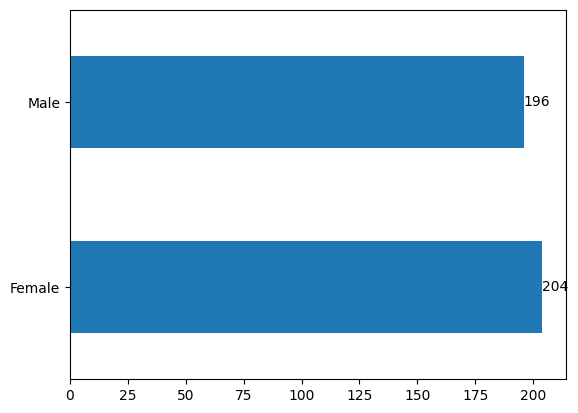

In [250]:
ax = df['Gender'].value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])

[Text(0, 0, '127'), Text(0, 0, '77'), Text(0, 0, '130'), Text(0, 0, '66')]

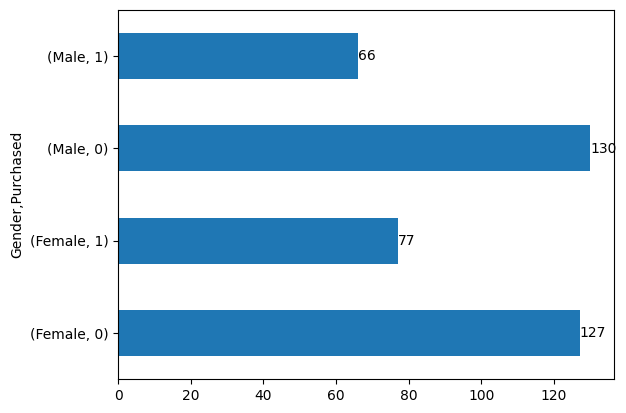

In [251]:
ax = df.groupby('Gender')['Purchased'].value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])

C:\Users\Basic\AppData\Local\Temp\ipykernel_6872\1181410941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = df.corr()['Purchased'].sort_values().plot(kind='barh')


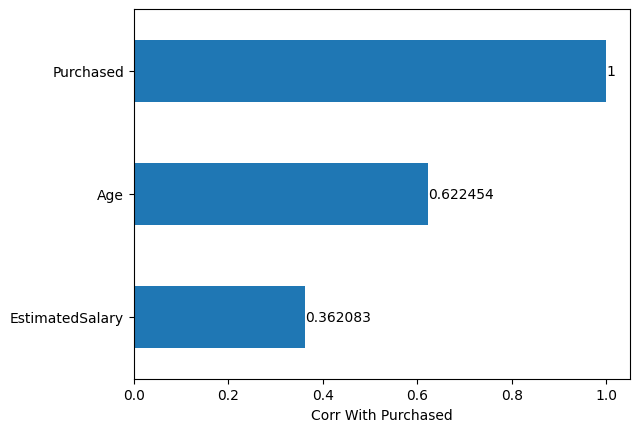

In [252]:
ax = df.corr()['Purchased'].sort_values().plot(kind='barh')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Corr With Purchased')
plt.show()

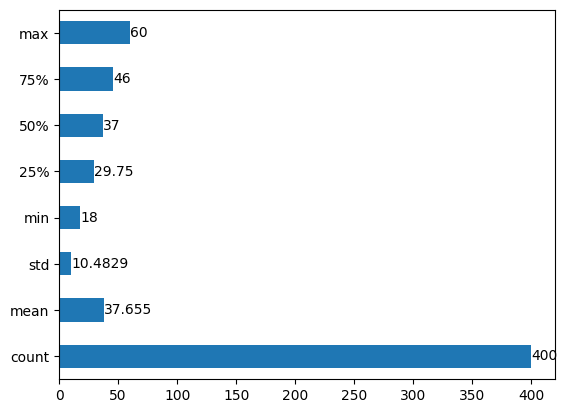

In [253]:
ax= df.iloc[:,1].describe().plot(kind='barh')
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Density'>

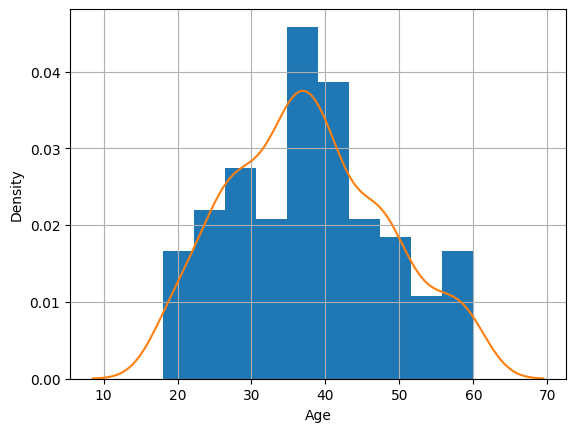

In [254]:
df['Age'].hist(density=True)
sns.kdeplot(data=df['Age'])

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Density'>

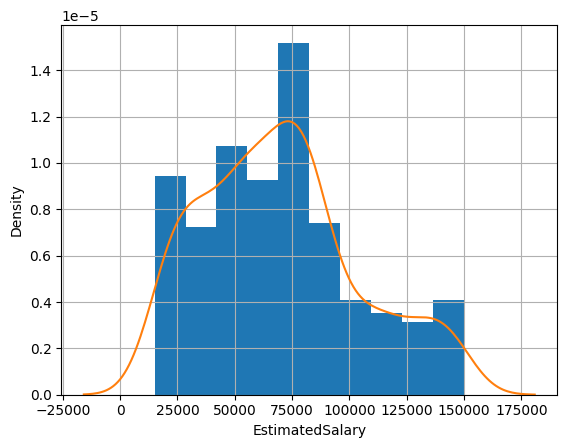

In [255]:
df['EstimatedSalary'].hist(density=True)
sns.kdeplot(data=df['EstimatedSalary'])

**3.** **Preprocessing**

In [256]:
df.rename(columns={'Gender':0,'Age':1,'EstimatedSalary':2},inplace=True)

In [257]:
trf1 = ColumnTransformer(
    [
        ('Scaling',StandardScaler(),[1,2])
    ],remainder='passthrough'
)
trf2 = ColumnTransformer(
    [
        ('Encoding',OneHotEncoder(sparse_output=False, dtype='int32'),[2])
    ],remainder='passthrough'
)

In [258]:
d_pipe = Pipeline(
    [
        ('scaling',trf1),
        ('enncoding',trf2),
        ('classifier',SVC(kernel='linear'))
    ]
)
d_pipe.fit(df.iloc[:,[0,1,2]],df['Purchased'])

Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaling', StandardScaler(),
                                                  [1, 2])])),
                ('enncoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding',
                                                  OneHotEncoder(dtype='int32',
                                                                sparse_output=False),
                                                  [2])])),
                ('classifier', SVC(kernel='linear'))])

In [259]:
y_pred = d_pipe.predict(df.iloc[:,[0,1,2]])

In [260]:
from sklearn.metrics import accuracy_score,precision_score
ac = accuracy_score(df['Purchased'],y_pred)
print(ac)
pc = precision_score(df['Purchased'],y_pred,average='micro')
print(pc)

0.845
0.845


**4.** **Deploy**

In [261]:
import pickle as pkl

In [262]:
pkl.dump(d_pipe,open('pipe.pkl','wb'))